# Create a scene to observe
Because we're observing disks, we patch together a bunch of dots.

adding 25pt disk with r:20", dr:5", tot flux:1mJy @ 15um, temp:180K, incl:45deg


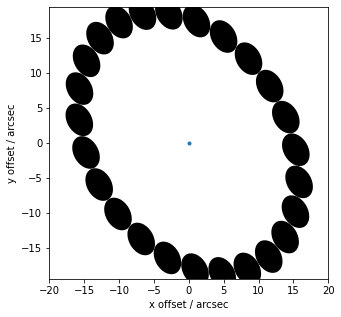

In [1]:
# quickstart
import jwst_pancake.scene as pc_scene
import pandisk as pd
targ = [pd.scene_star('a5v', 4.8)]
targ = pd.add_ring(targ, 20, 5, 1, 180, 15, 45, 30)
pc_scene.rotate_scene(targ, -30)
pd.plot_disk_scene(targ)

In [1]:
import json
import numpy as np
import astropy.io.fits

import jwst_pancake.scene as pc_scene
import pandisk as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# primary star
target_ls = 8.
target_pc = 28
target_mv = 4.8
target_sp = 'a5v'

# reference star, spectral type shouldn't matter too much
ref_mv = 5
ref_sp = 'a3v'

## Get a star

In [3]:
# create target and ref stars
targ = [pd.scene_star(target_sp, target_mv)]
ref = [pd.scene_star(ref_sp, ref_mv)]

## Now add some disk components
Below are a few different ways one might do this.

In [4]:
# individual belts, one element per component
r = np.array([20.,70]) / target_pc
dr = np.array([5.,10]) / target_pc
tot_flux = [20, 0.2]    # mJy
temp = [100., 42.]      # K
norm_wave = [20., 20.]  # um

# common geometry
inc = 70  # deg
pa = 30

for r1, dr1, fl1, t1, w1 in zip(r, dr, tot_flux, temp, norm_wave):
    targ = pd.add_ring(targ, r1, dr1, fl1, t1, w1, inc, pa)
    
pc_scene.rotate_scene(targ, -pa)

adding 25pt disk with r:0.714286", dr:0.178571", tot flux:20mJy @ 20.0um, temp:100K, incl:70deg
adding 43pt disk with r:2.5", dr:0.357143", tot flux:0.2mJy @ 20.0um, temp:42K, incl:70deg


In [ ]:
# create an extended disk
r = np.linspace(20, 100, 9) / target_pc
dr = np.diff(r)
r_cen = r[:-1] + np.diff(r)/2
temp = 278.3 * target_ls**0.25 / np.sqrt(r_cen)
flux = 1 / np.sqrt(r_cen)

targ = pd.add_radial_profile(targ, r_cen, dr, flux, temp, norm_wave[0], inc, pa)

pc_scene.rotate_scene(targ, -pa)

In [ ]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

In [ ]:
# if we were importing an image
f = '/Users/grant/Dropbox/astro/collab/alanjackson/jwst-collision-point/sig03-densxy-pix0011.fits'
h = astropy.io.fits.open(f)
img = astropy.io.fits.getdata(f)
img = 1000 * img.astype(float) / np.sum(img.astype(float))

img = rebin(img, (67,67))

aspp = 0.1
# img = np.random.uniform(size=(20,20))
y, x = np.indices(img.shape) * aspp
x -= (img.shape[1]-1) / 2. * aspp
y -= (img.shape[0]-1) / 2. * aspp
r = np.sqrt( x**2 + y**2 )
dx = np.diff(x)[0,0]
temp = lambda x: 278.3 * target_ls**0.25 / np.sqrt(x)
ni = 2
# targ = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[j,i] > np.max(img)/1e3:
            s = pd.get_dot(id=ni, x=x[j,i], y=y[j,i], size=dx, norm_wave=20, norm_flux=img[j,i], temp=temp(r[j,i]))
            targ.append(s)
            ni += 1

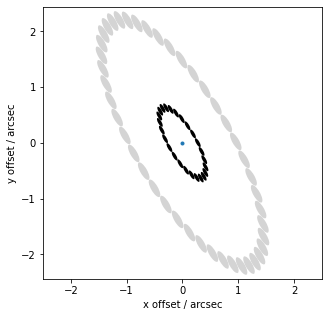

In [5]:
# plot it
pd.plot_disk_scene(targ, file='targ.png')

In [6]:
with open('targ.json','w') as f:
    json.dump(targ, f)
    
with open('ref.json','w') as f:
    json.dump(ref, f)    